<a href="https://colab.research.google.com/github/tiaracantiq/gitgithub/blob/main/Logistic_Regression_with_Evaluation_Model_ROC_AUC_Result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error, r2_score,
    confusion_matrix, accuracy_score, classification_report
)

import dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
import pandas as pd

file_path = '/content/drive/My Drive/Praktikum SIAB/Dataset Praktikum4/data.csv'
df = pd.read_csv(file_path, encoding='latin1')

print("Data awal:")
print(df.head())


Data awal:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


persiapan dataset

memuat dataset

In [10]:
# The dataset has already been loaded in a previous cell (OUQvt-h_j8nZ).
# The 'df' DataFrame is already available.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


cek struktur data

In [11]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


preprocessing

data cleaning

In [12]:
#menghapus data tanpa CustomerID
df = df.dropna(subset=['CustomerID'])
#menghapus transaksi dengan Quantity<= 0 atau UnitPrice<= 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


menambah feature engine

In [13]:
#total transaksi per baris
df['TotalSpending'] = df['Quantity'] * df['UnitPrice']

agregasi data pelanggan

In [14]:
customer_df = df.groupby('CustomerID').agg({
 'Quantity': 'sum',
 'TotalSpending': 'sum',
 'InvoiceNo': 'nunique'
}).reset_index()
customer_df.rename(columns={'InvoiceNo':
'TotalTransaction'}, inplace=True)
customer_df.head()


,CustomerID,Quantity,TotalSpending,TotalTransaction
0,12346.0,74215,77183.60,1
1,12347.0,2458,4310.00,7
2,12348.0,2341,1797.24,4
3,12349.0,631,1757.55,1
4,12350.0,197,334.40,1


Visualisasi EDA

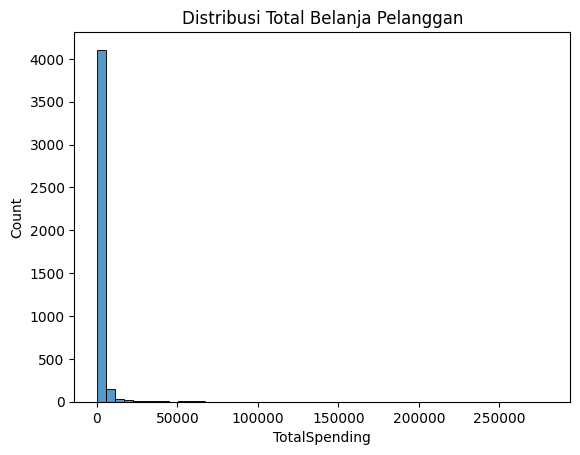

In [15]:
sns.histplot(customer_df['TotalSpending'], bins=50)
plt.title("Distribusi Total Belanja Pelanggan")
plt.show()


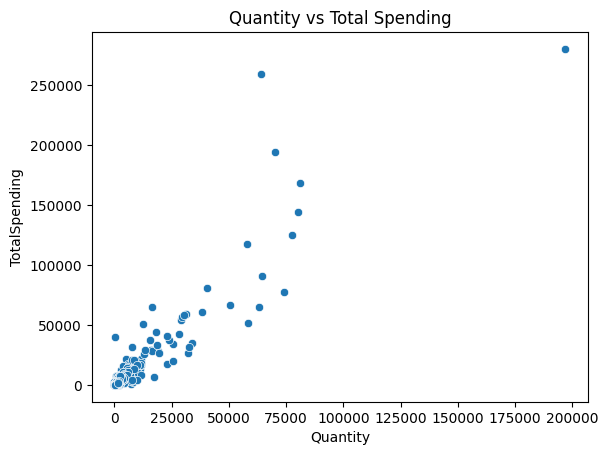

In [16]:
#hubungan Quality vs TotalSpending
sns.scatterplot(
 x='Quantity', y='TotalSpending',
 data=customer_df
)
plt.title("Quantity vs Total Spending")
plt.show()

pemodelan linear regression

In [17]:
X_lr = customer_df[['Quantity', 'TotalTransaction']]
y_lr = customer_df['TotalSpending']

split dataset

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
 X_lr, y_lr, test_size=0.2, random_state=42
)


melatih model dengan linear regression

In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

evaluasi model

In [20]:
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R²:", r2)

MSE: 32919766.163749408
R²: 0.6786523219494156


pemodelan logistic regression

menentukan target klasifikasi

In [21]:
threshold = customer_df['TotalSpending'].quantile(0.75)
customer_df['HighValue'] = (customer_df['TotalSpending'] >=
threshold).astype(int)


menentukan variabel

In [22]:
X_log = customer_df[['Quantity', 'TotalTransaction']]
y_log = customer_df['HighValue']


standarisasi data

In [23]:
scaler = StandardScaler()
X_log_scaled = scaler.fit_transform(X_log)

pembagian dataset

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
 X_log_scaled, y_log, test_size=0.2, random_state=42
)


training model

In [25]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)


LogisticRegression()

evaluasi model logistic regression

In [26]:
y_pred = log_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9389400921658986
[[636  17]
 [ 36 179]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       653
           1       0.91      0.83      0.87       215

    accuracy                           0.94       868
   macro avg       0.93      0.90      0.92       868
weighted avg       0.94      0.94      0.94       868



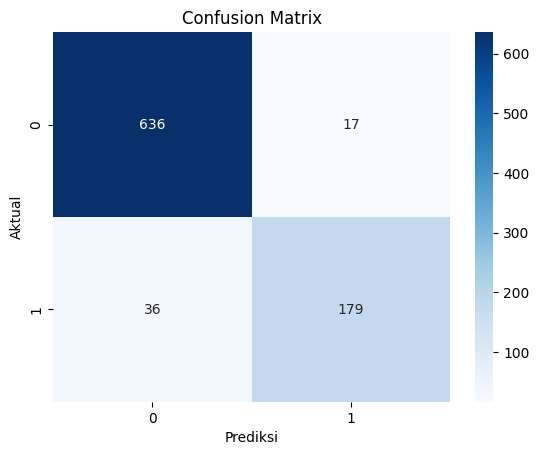

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred),
 annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

 Tambahkan evaluasi model pada Logistic Regression hasil ROC-AUC

ROC-AUC Score: 0.98


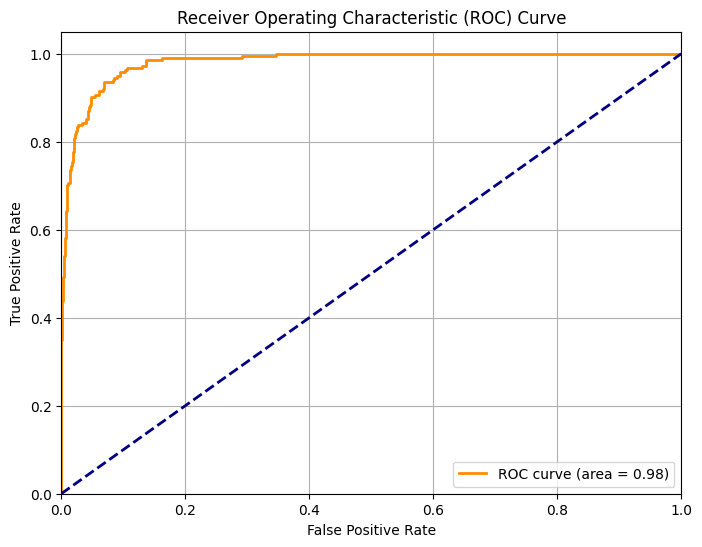

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Print ROC-AUC score
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()